# **EDA - IMÁGENES MÉDICAS (.nii)**

In [1]:
# [Config] Librerías
import pandas as pd
import os
import nibabel as nib
import re
import numpy as np
import pandas as pd
from datetime import datetime
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# [Config] Rutas
ruta  = r"C:\Users\Hp\MACHINE\MRI\IMAGES"
df = pd.read_csv("ADNI_Images.csv")
df['EXAMDATE'] = pd.to_datetime(df['EXAMDATE'], errors='coerce')
mapa_viscode = {"m06": 6,"m12": 12,"m18": 18,"m24": 24,"m36": 36,"m48": 48,"m60": 60}
df["VISCODE"] = df["VISCODE"].map(mapa_viscode)
def categorizar_educacion(anios):
    if anios <= 10:
        return "Primaria o menos"
    elif anios <= 12:
        return "Secundaria completa"
    elif anios <= 14:
        return "Técnico o incompleto universitario"
    elif anios <= 16:
        return "Universitario completo"
    elif anios <= 18:
        return "Posgrado corto"
    else:
        return "Posgrado avanzado"
df["PTEDUCAT"] = df["PTEDUCAT"].apply(categorizar_educacion)

## **1. Descripción del conjunto de datos**

In [3]:
# []
print("📁 Información general:")
print(f"\nDimensión: {df.shape[0]} Imágenes disponibles × {df.shape[1]} atributos")
print(f"\nTipo de atributos: \n{df.dtypes.value_counts()}")
print("-" * 30)
print(f"👦 {df['sujeto_id'].nunique()} sujetos en estudio")
print("-" * 30)
print(f"Variables con valores nulos: \n{df.isna().sum()[df.isna().sum() > 0]}")

📁 Información general:

Dimensión: 298 Imágenes disponibles × 37 atributos

Tipo de atributos: 
float64           23
object            13
datetime64[ns]     1
Name: count, dtype: int64
------------------------------
👦 54 sujetos en estudio
------------------------------
Variables con valores nulos: 
VISCODE             89
DX                  35
CDRSB               37
MMSE                35
ADAS13              36
FAQ                 38
RAVLT_immediate     37
RAVLT_learning      37
RAVLT_forgetting    38
DIGITSCOR           37
TRABSCOR            38
Ventricles          45
Hippocampus         74
WholeBrain          45
Entorhinal          74
Fusiform            74
MidTemp             74
ICV                 45
dtype: int64


## **2. Propiedades técnicas de las imágenes**

In [4]:
# [] Formato de imagen - Orientación - Tipo de dato y unidades
shape_counts = df["shape"].value_counts() #Formatos de imagen
orint_counts = df["orientation"].value_counts() #Orientación espacial

tabla_shape= pd.DataFrame({
    "Shape": shape_counts.index,
    "Imágenes": shape_counts.values
})

tabla_orientarion= pd.DataFrame({
    "Orientación": orint_counts.index,
    "Imágenes": orint_counts.values
})

print("\nFormatos de imagen:")
print(tabla_shape)

print("\nOrientación:")
print(tabla_orientarion)

print(f"\nTipos de datos {df['datatype'].unique()} \nUnidades {df['units'].unique()}") #Tipo de dato y unidades



Formatos de imagen:
             Shape  Imágenes
0  (160, 192, 192)       102
1  (166, 256, 256)       100
2  (256, 256, 170)        36
3  (180, 256, 256)        36
4  (256, 256, 184)         9
5  (160, 240, 256)         6
6  (170, 256, 256)         6
7  (176, 256, 256)         1
8  (170, 288, 288)         1
9  (162, 256, 256)         1

Orientación:
       Orientación  Imágenes
0  ('R', 'A', 'S')       253
1  ('P', 'S', 'R')        45

Tipos de datos ['int16'] 
Unidades ["('mm', 'sec')"]


In [5]:
# Resoluciones de voxel
voxel_counts = df["voxel_size"].value_counts()
volumen_counts = df["voxel_volume_mm3"].value_counts()
total_counts = df["total_volume"].value_counts()

tabla_voxel= pd.DataFrame({
    "Voxel": voxel_counts.index,
    "Imágenes": voxel_counts.values
})
tabla_volum= pd.DataFrame({
    "Volumen": volumen_counts.index,
    "Imágenes": volumen_counts.values
})
tabla_total= pd.DataFrame({
    "Volumen total": total_counts.index,
    "Imágenes": total_counts.values
})

print("\nResoluciones de voxel:")
print(tabla_voxel)
print("\nVolumen de voxel:")
print(tabla_volum)
print("\nVolumen estimado:")
print(tabla_total)


Resoluciones de voxel:
                          Voxel  Imágenes
0         (1.2, 0.9375, 0.9375)       125
1             (1.2, 1.25, 1.25)       100
2         (0.9375, 0.9375, 1.2)        43
3   (1.1998978, 0.9375, 0.9375)         6
4               (1.2, 1.0, 1.0)         6
5   (1.1996994, 0.9375, 0.9375)         3
6   (1.1996002, 0.9375, 0.9375)         3
7         (1.2, 0.9766, 0.9766)         1
8   (1.2, 0.8680556, 0.8680556)         1
9   (0.9765625, 0.9765625, 1.2)         1
10        (1.1999999, 1.0, 1.0)         1
11              (1.0, 1.0, 1.2)         1
12    (1.2, 0.976562, 0.976562)         1
13  (1.1996994, 0.9766, 0.9766)         1
14  (1.2001953, 0.9375, 0.9375)         1
15  (1.2003021, 0.9375, 0.9375)         1
16  (1.2, 1.2760416, 1.2760416)         1
17  (1.2, 1.3020834, 1.3020834)         1
18   (1.199884, 0.9375, 0.9375)         1

Volumen de voxel:
     Volumen  Imágenes
0   1.054688       168
1   1.875000       100
2   1.200000         7
3   1.054598         6
4 

Qué significa cada código?
- 'R', 'L': Right / Left (derecha / izquierda)
- 'A', 'P': Anterior / Posterior (frontal / trasera)
- 'S', 'I': Superior / Inferior (arriba / abajo)
Por ejemplo:
- ('R', 'A', 'S'): Ejes orientados hacia la derecha, adelante y arriba.
- ('P', 'S', 'R'): Ejes hacia atrás, arriba y derecha — diferente orden y dirección.


In [6]:
# Intensidad de imagen
print("Intensidad de la imagen")
print("-" * 30)
# Brillo
resumen_mean = df['mean_intensity'].describe().round(2).to_frame(name='mean_intensity')
resumen_mean.index.name = 'Brillo'
print(resumen_mean)
print("-" * 30)
# Contraste
resumen_std = df['std_intensity'].describe().round(2).to_frame(name='std_intensity')
resumen_std.index.name = 'Contraste'
print(resumen_std)

Intensidad de la imagen
------------------------------
        mean_intensity
Brillo                
count           298.00
mean          31193.37
std           70376.95
min              11.66
25%             102.88
50%             132.38
75%             277.08
max          363261.17
------------------------------
           std_intensity
Contraste               
count             298.00
mean            46832.84
std            106557.80
min                16.62
25%               134.49
50%               170.34
75%               372.56
max            579786.68


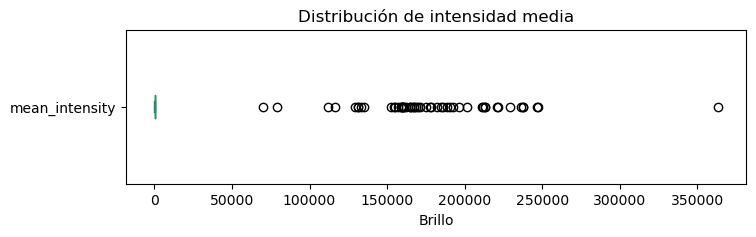

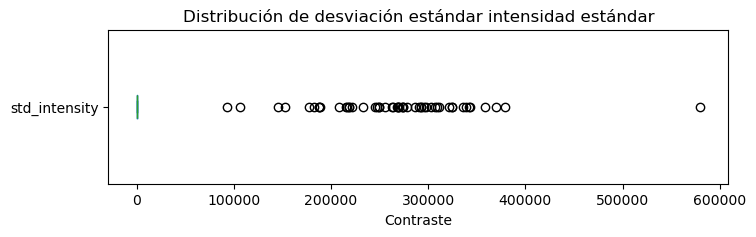

In [7]:
plt.figure(figsize=(8, 2))
df['mean_intensity'].plot.box(vert=False)
plt.title("Distribución de intensidad media")
plt.xlabel("Brillo")

plt.figure(figsize=(8, 2))
df['std_intensity'].plot.box(vert=False)
plt.title("Distribución de desviación estándar intensidad estándar")
plt.xlabel("Contraste")
plt.show()

In [8]:
# Configuración mayoritaria de las imágenes
variables = {
    "shape": df["shape"],
    "orientation": df["orientation"],
    "voxel_size": df["voxel_size"],
    "voxel_volume_mm3": df["voxel_volume_mm3"],
    "total_volume": df["total_volume"]
}

# Construir tabla resumen
resumen = []

for nombre, serie in variables.items():
    valor_frecuente = serie.value_counts().idxmax()
    cantidad_frecuente = serie.value_counts().max()
    cantidad_diferente = (serie != valor_frecuente).sum()
    
    resumen.append({
        "Variable": nombre,
        "Más frecuente": valor_frecuente,
        "Cantidad": cantidad_frecuente,
        "Diferentes": cantidad_diferente
    })

tabla_resumen = pd.DataFrame(resumen)
print(tabla_resumen)

           Variable          Más frecuente  Cantidad  Diferentes
0             shape        (160, 192, 192)       102         196
1       orientation        ('R', 'A', 'S')       253          45
2        voxel_size  (1.2, 0.9375, 0.9375)       125         173
3  voxel_volume_mm3               1.054688       168         130
4      total_volume             11059200.0       100         198


In [9]:
# Imágenes con brillo y contraste outliers
def detectar_outliers_iqr(serie, nombre_columna):
    """
    Devuelve un DataFrame con los valores outliers de una columna numérica según el método IQR.
    """
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = (serie < limite_inferior) | (serie > limite_superior)
    print(f"🔹{nombre_columna}: {outliers.sum()} outliers detectados")
    return outliers

df["outlier_mean_intensity"] = detectar_outliers_iqr(df["mean_intensity"], "mean_intensity")
df["outlier_std_intensity"] = detectar_outliers_iqr(df["std_intensity"], "std_intensity")

# Etiqueta combinada de calidad
df["calidad_intensidad"] = "ok"
df.loc[df["outlier_mean_intensity"], "calidad_intensidad"] = "outlier_media"
df.loc[df["outlier_std_intensity"], "calidad_intensidad"] = "outlier_contraste"
df.loc[df["outlier_mean_intensity"] & df["outlier_std_intensity"], "calidad_intensidad"] = "outlier_ambos"



🔹mean_intensity: 52 outliers detectados
🔹std_intensity: 52 outliers detectados


In [10]:
# Puntaje de calidad 

shape_fr = df["shape"].value_counts().idxmax()
orien_fr = df["orientation"].value_counts().idxmax()
voxel_fr = df["voxel_size"].value_counts().idxmax()
volum_fr = df["voxel_volume_mm3"].value_counts().idxmax()
total_fr = df["total_volume"].value_counts().idxmax()

# Criterios de calidad
df["fail_shape"] = df["shape"] != shape_fr
df["fail_orientation"] = df["orientation"] != orien_fr
df["fail_voxel_size"] = df["voxel_size"] != voxel_fr
df["fail_voxel_volume"] = df["voxel_volume_mm3"] != volum_fr
df["fail_total_volume"] = df["total_volume"] != total_fr

# Outliers de intensidad
def detectar_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    return (serie < Q1 - 1.5 * IQR) | (serie > Q3 + 1.5 * IQR)

df["fail_mean_intensity"] = detectar_outliers_iqr(df["mean_intensity"])
df["fail_std_intensity"] = detectar_outliers_iqr(df["std_intensity"])

# Puntaje total de fallos por imagen
df["puntaje_calidad"] = (
    df["fail_shape"].astype(int) +
    df["fail_orientation"].astype(int) +
    df["fail_voxel_size"].astype(int) +
    df["fail_voxel_volume"].astype(int) +
    df["fail_total_volume"].astype(int) +
    df["fail_mean_intensity"].astype(int) +
    df["fail_std_intensity"].astype(int)
)
resumen_puntajes = df["puntaje_calidad"].value_counts().sort_index()
print(" Distribución de puntajes de calidad:")
resumen_puntajes= pd.DataFrame({
    "Puntaje": resumen_puntajes.index,
    "Imágenes": resumen_puntajes.values
})
print(resumen_puntajes)

 Distribución de puntajes de calidad:
   Puntaje  Imágenes
0        2       220
1        3         2
2        4        29
3        6        45
4        7         2


% Los puntajes de calidad indican que tan corrupta esta una imagen

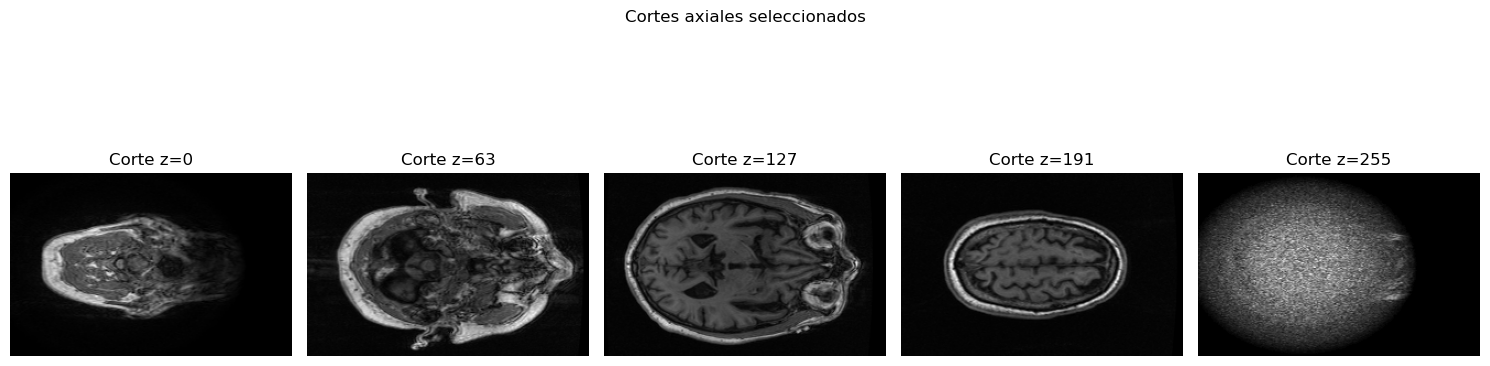

In [11]:

# Cargar imagen
img = nib.load(r"C:\Users\Hp\MACHINE\MRI\IMAGES\007_S_0101\MP-RAGE\2008-12-23_12_17_53.0\I132151\ADNI_14_M4_TS_2_2.nii")
data = img.get_fdata()

# Seleccionar 5 cortes equiespaciados en el eje axial (z)
num_cortes = 5
indices = np.linspace(0, data.shape[2] - 1, num_cortes, dtype=int)

# Mostrar los cortes
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, num_cortes, i + 1)
    plt.imshow(data[:, :, idx], cmap="gray")
    plt.title(f"Corte z={idx}")
    plt.axis("off")

plt.suptitle("Cortes axiales seleccionados")
plt.tight_layout()
plt.show()


## **2. Sobre el paciente**

In [12]:
# Crear DataFrame resumen por sujeto
info_sujetos = df.groupby('sujeto_id').agg({
    'AGE': 'mean',         # Edad
    'PTGENDER': 'first',   # género
    'PTEDUCAT': 'first',   # educación
    'DX': 'last',
    'APOE4': 'first',
}).reset_index()

------------------------------
Edades de los pacientes
count    54.000000
mean     74.907407
std       7.128229
min      60.300000
25%      70.375000
50%      75.500000
75%      79.675000
max      88.300000
Name: AGE, dtype: float64


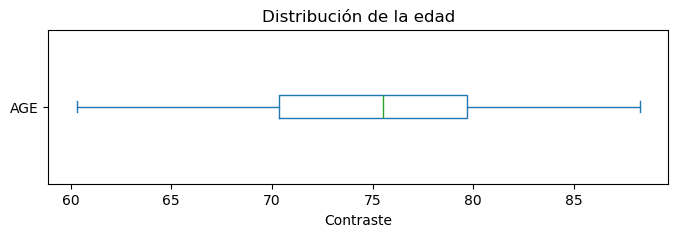

In [13]:
# EDADES
print("-"*30)
print("Edades de los pacientes")
print(info_sujetos['AGE'].describe())
plt.figure(figsize=(8, 2))
info_sujetos['AGE'].plot.box(vert=False)
plt.title("Distribución de la edad")
plt.xlabel("Contraste")
plt.show()

------------------------------
Sexo de los pacientes
          count
PTGENDER       
Male         41
Female       13


<Axes: ylabel='PTGENDER'>

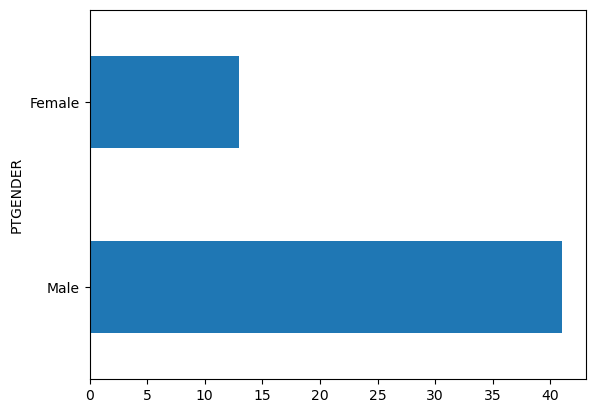

In [14]:
# SEXO
print("-"*30)
print("Sexo de los pacientes")
print(info_sujetos['PTGENDER'].value_counts().to_frame())
info_sujetos['PTGENDER'].value_counts().plot.barh()

------------------------------
Nivel educativo de los pacientes
                                    count
PTEDUCAT                                 
Universitario completo                 17
Posgrado corto                         14
Posgrado avanzado                      11
Técnico o incompleto universitario      5
Secundaria completa                     4
Primaria o menos                        3


<Axes: ylabel='PTEDUCAT'>

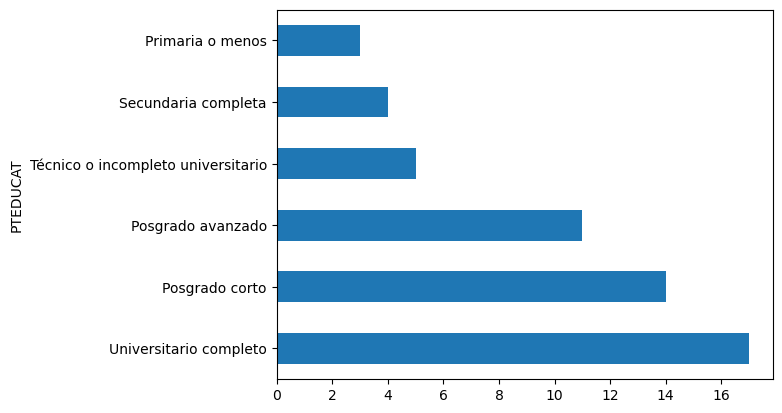

In [15]:
# Educación
print("-"*30)
print("Nivel educativo de los pacientes")
print(info_sujetos['PTEDUCAT'].value_counts().to_frame())
info_sujetos['PTEDUCAT'].value_counts().plot.barh()

------------------------------
Genotipo APOE4
       count
APOE4       
1.0       24
0.0       24
2.0        6


<Axes: ylabel='APOE4'>

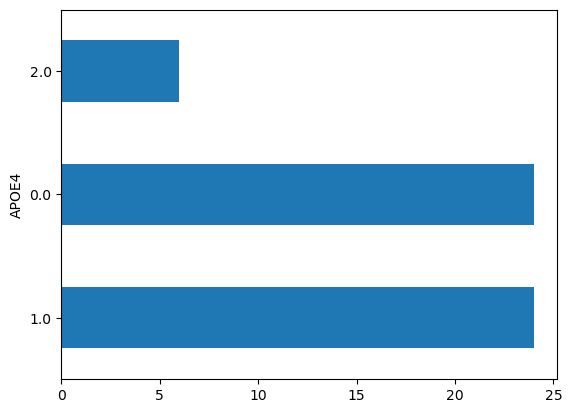

In [16]:
# Educación
print("-"*30)
print("Genotipo APOE4")
print(info_sujetos['APOE4'].value_counts().to_frame())
info_sujetos['APOE4'].value_counts().plot.barh()

------------------------------
Genotipo DX
          count
DX             
MCI          31
Dementia     22
CN            1


<Axes: ylabel='DX'>

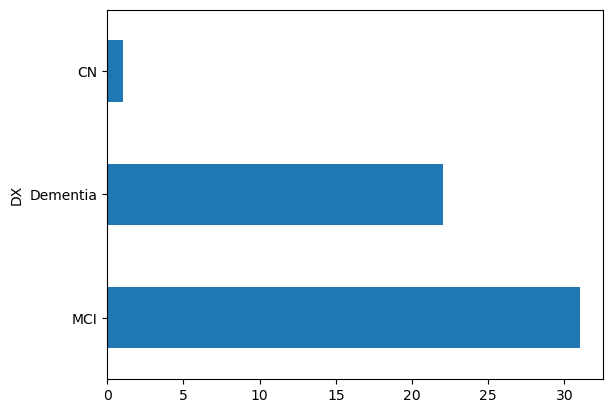

In [17]:
# Diagnóstico final
print("-"*30)
print("Genotipo DX")
print(info_sujetos['DX'].value_counts().to_frame())
info_sujetos['DX'].value_counts().plot.barh()

% mejorar graficos  e interpretacion

                count
duracion_anios       
0                   2
1                  12
2                  22
3                  15
4                   2
5                   1


<Axes: ylabel='duracion_anios'>

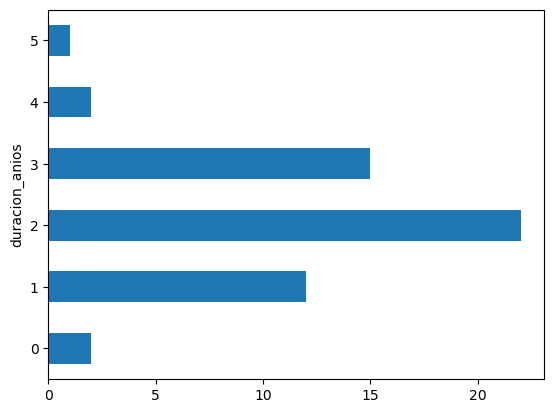

In [18]:
df["EXAMDATE"] = pd.to_datetime(df["EXAMDATE"])
df["año"] = df["EXAMDATE"].dt.year
df_duracion = df.sort_values(["sujeto_id", "EXAMDATE"]).groupby("sujeto_id").agg(
    año_inicio=("año", "first"),
    año_final=("año", "last")
).reset_index()

df_duracion["duracion_anios"] = df_duracion["año_final"] - df_duracion["año_inicio"]
print(df_duracion["duracion_anios"].value_counts().sort_index().to_frame())

df_duracion["duracion_anios"].value_counts().sort_index().plot.barh()

## **3. Progresión clínica**

Resumen de número de visitas por paciente:


Text(0, 0.5, 'Frecuencia')

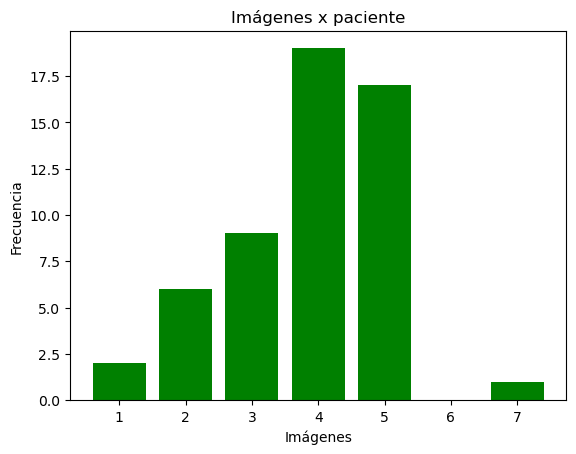

In [19]:
# Vistas por pacientes
tabla_visitas = (
    df
    .assign(valor="O")  # marcamos presencia
    .pivot_table(index="sujeto_id", columns="VISCODE", values="valor", aggfunc="first", fill_value="X")
    .sort_index(axis=1)
)
tabla_visitas
conteo_visitas = (tabla_visitas == "O").sum(axis=1)
resumen_visitas = conteo_visitas.value_counts().sort_index()
tabla_resumen = pd.DataFrame({
    "Vistas": resumen_visitas.index,
    "Pacientes": resumen_visitas.values
})
print("Resumen de número de visitas por paciente:")
plt.bar(tabla_resumen["Vistas"], tabla_resumen["Pacientes"], color='green')
plt.title("Imágenes x paciente")
plt.xlabel("Imágenes")
plt.ylabel("Frecuencia")

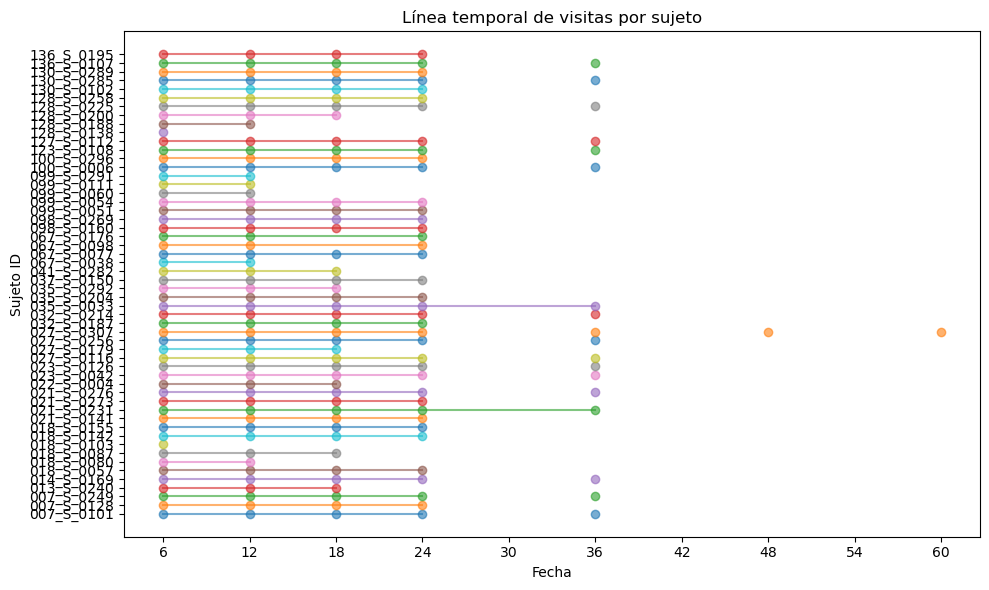

In [20]:
# Linea de vistas por sujeto
plt.figure(figsize=(10,6))
for sid, grupo in df.groupby('sujeto_id'):
    plt.plot(grupo['VISCODE'], [sid]*len(grupo), marker='o', linestyle='-', alpha=0.6)
plt.title('Línea temporal de visitas por sujeto')
plt.xticks(ticks=range(6, 66, 6))
plt.xlabel('Fecha')
plt.ylabel('Sujeto ID')
plt.tight_layout()
plt.show()


% Grafico importantisimo

         count
VISCODE       
6.0         54
12.0        52
18.0        44
24.0        39
36.0        18
48.0         1
60.0         1


<Axes: ylabel='VISCODE'>

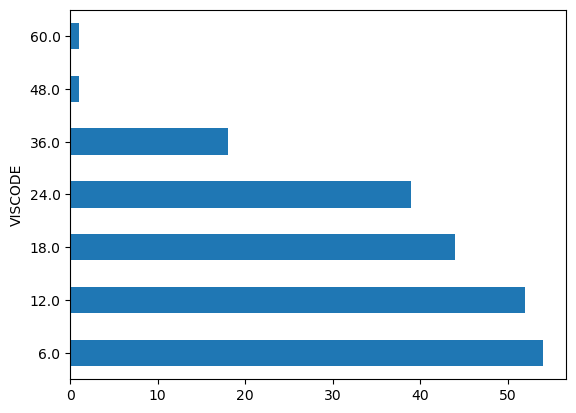

In [21]:
print(df["VISCODE"].value_counts().sort_index().to_frame())
df['VISCODE'].value_counts().sort_index().plot.barh()

* Variables sobre el estado cognitivo
% Buscar que significa cada cosa

In [22]:
# Variables cognitivas
info_cognitiva = df.groupby('sujeto_id').agg({
    'CDRSB': ['min', 'mean', 'max'],
    'MMSE': ['min', 'mean', 'max'],
    'ADAS13': ['min', 'mean', 'max'],
    'FAQ': ['min', 'mean', 'max'],
    'RAVLT_immediate':['min', 'mean', 'max'],
    'RAVLT_learning': ['min', 'mean', 'max'],
    'RAVLT_forgetting': ['min', 'mean', 'max'],
    'DIGITSCOR': ['min', 'mean', 'max'],
    'TRABSCOR': ['min', 'mean', 'max'],
}).reset_index()


C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


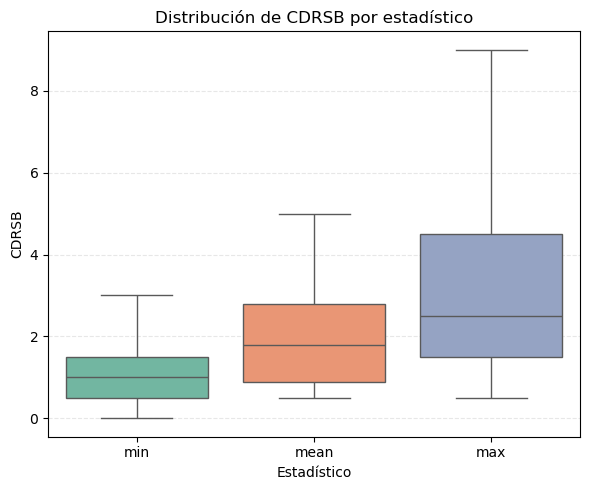

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


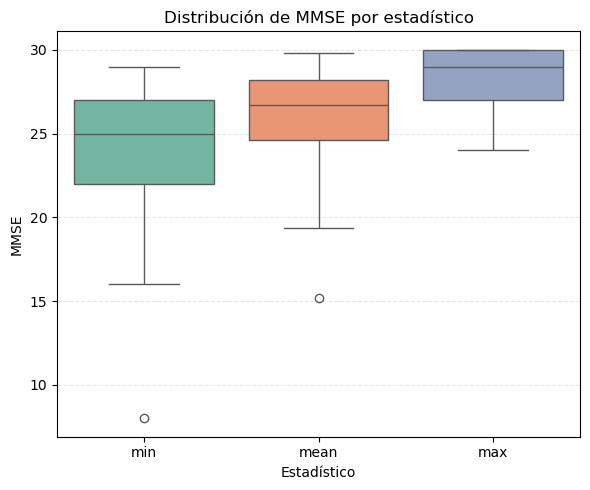

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


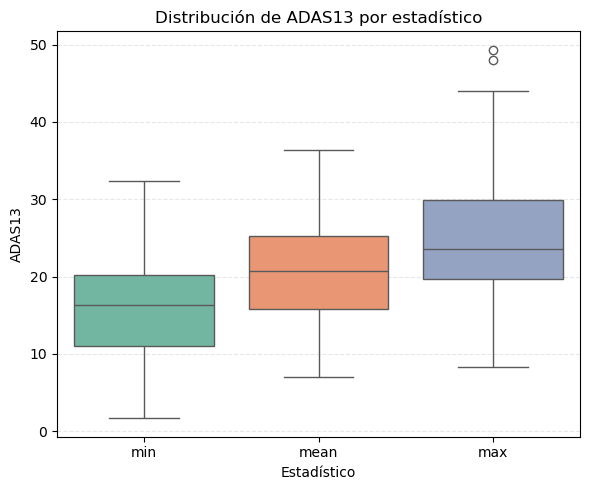

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


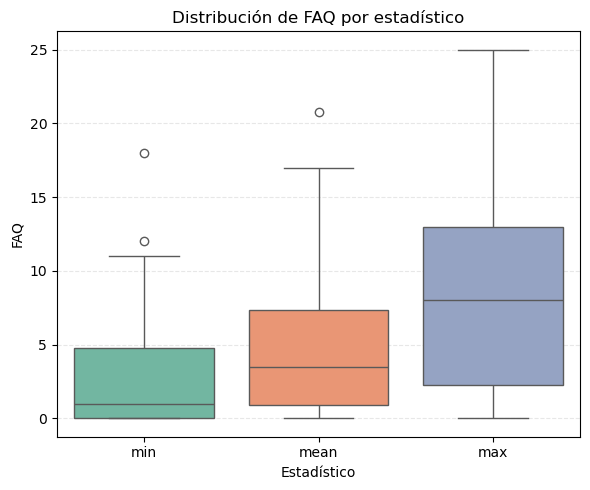

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


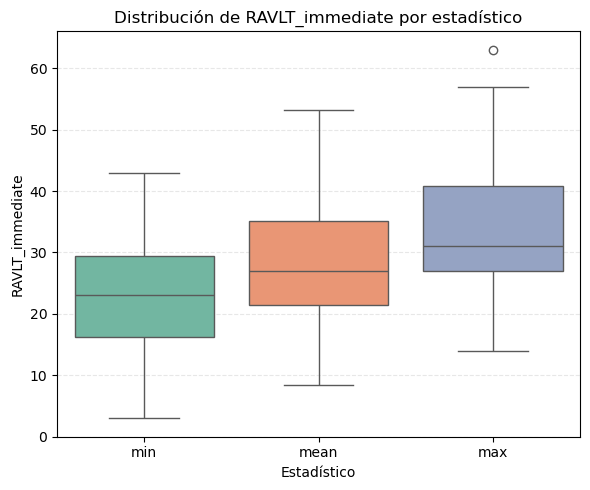

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


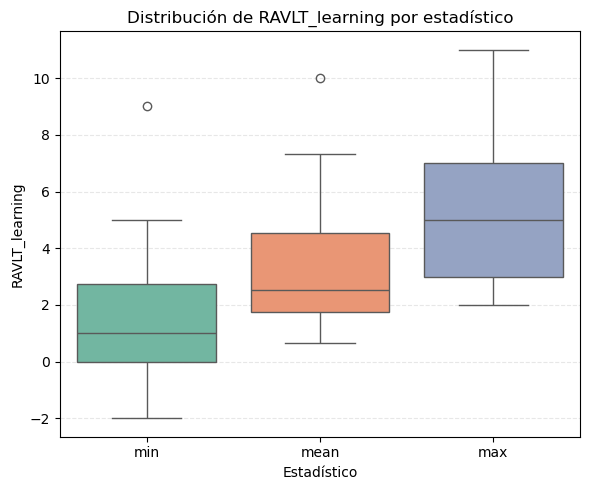

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


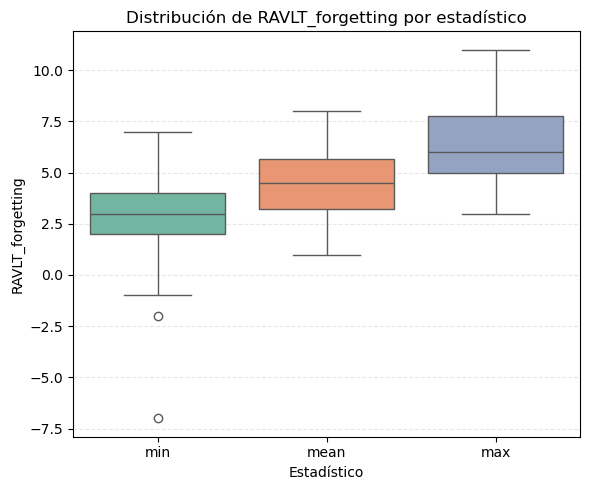

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


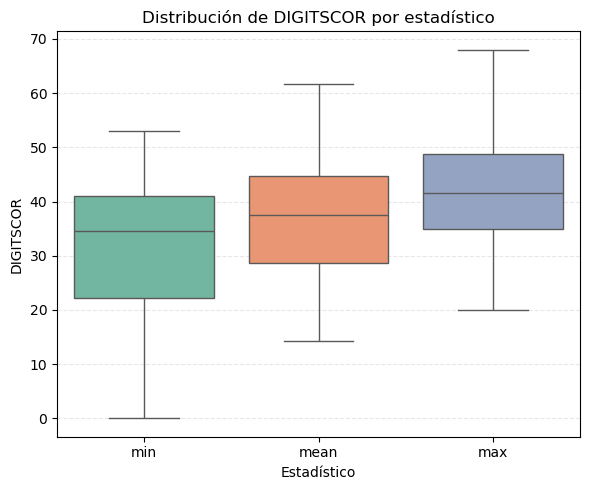

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


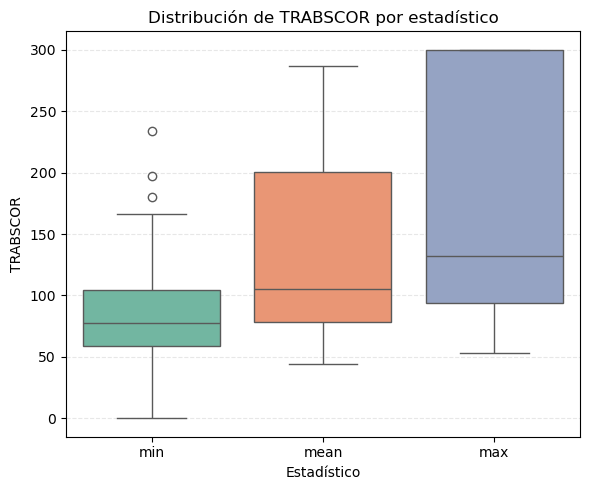

In [23]:
# Aplanar columnas
info_cognitiva.columns = ['sujeto_id'] + [f"{var}_{stat}" for var, stat in info_cognitiva.columns[1:]]

# Convertir a formato largo
info_long = pd.melt(
    info_cognitiva,
    id_vars="sujeto_id",
    var_name="variable_estadistica",
    value_name="valor"
)

# Separar nombre de variable y tipo de estadístico
info_long[["variable", "estadistica"]] = info_long["variable_estadistica"].str.rsplit("_", n=1, expand=True)

variables = info_long["variable"].unique()

for var in variables:
    plt.figure(figsize=(6, 5))
    sns.boxplot(
        data=info_long[info_long["variable"] == var],
        x="estadistica",
        y="valor",
        palette="Set2"
    )
    plt.title(f"Distribución de {var} por estadístico")
    plt.xlabel("Estadístico")
    plt.ylabel(var)
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

In [24]:
# Agrupar por variable y estadístico
tabla_resumen = info_long.groupby(["variable", "estadistica"])["valor"].agg(["min", "mean", "max"]).round(2).reset_index()
# Ordenar por variable y tipo de estadístico
tabla_resumen = tabla_resumen.sort_values(["variable", "estadistica"])

# Mostrar
tabla_resumen

,variable,estadistica,min,mean,max
0,ADAS13,max,8.33,25.02,49.33
1,ADAS13,mean,7.00,20.52,36.40
2,ADAS13,min,1.67,16.07,32.33
3,CDRSB,max,0.50,2.96,9.00
4,CDRSB,mean,0.50,1.95,5.00
5,CDRSB,min,0.00,1.04,3.00
6,DIGITSCOR,max,20.00,42.07,68.00
7,DIGITSCOR,mean,14.20,37.15,61.67
8,DIGITSCOR,min,0.00,31.17,53.00
9,FAQ,max,0.00,8.35,25.00


* Variables sobre le volumen MRI

In [25]:
# Variables de de Volúmenes MRI
info_volumen = df.groupby('sujeto_id').agg({
    'Ventricles' : ['min', 'mean', 'max'],
    'Hippocampus': ['min', 'mean', 'max'],
    'WholeBrain': ['min', 'mean', 'max'], 
    'Entorhinal': ['min', 'mean', 'max'],
    'Fusiform': ['min', 'mean', 'max'],
    'MidTemp': ['min', 'mean', 'max'],
    'ICV': ['min', 'mean', 'max']
}).reset_index()

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\1002387156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


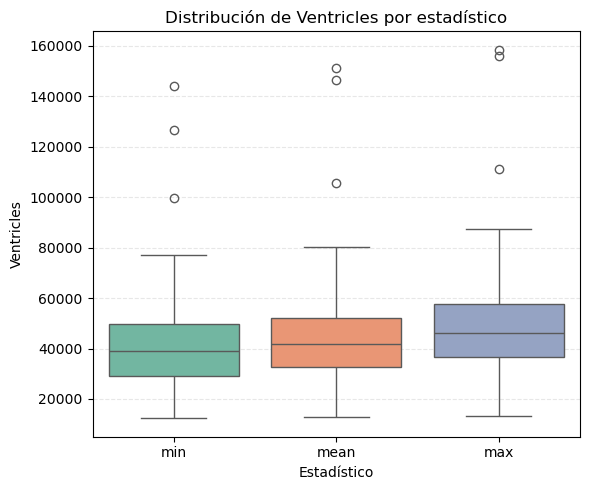

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\1002387156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


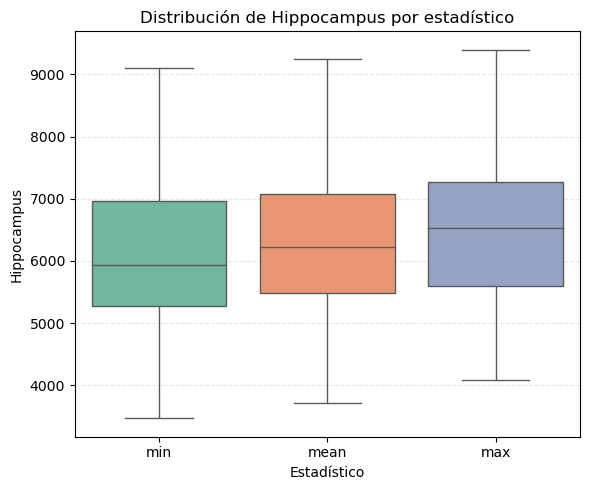

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\1002387156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


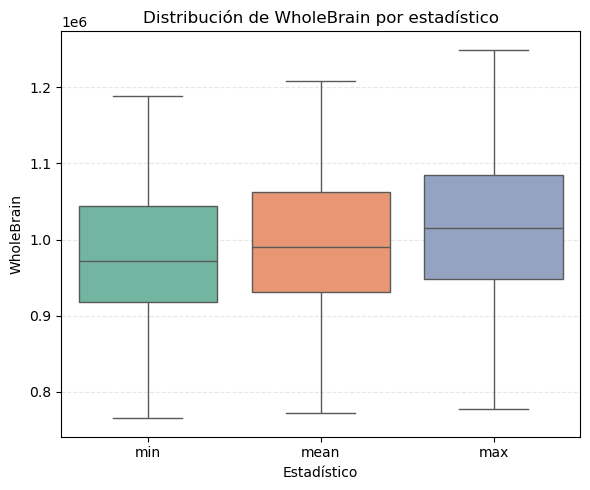

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\1002387156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


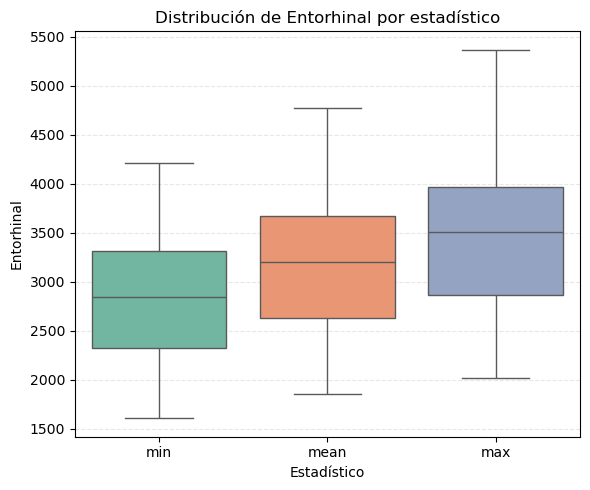

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\1002387156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


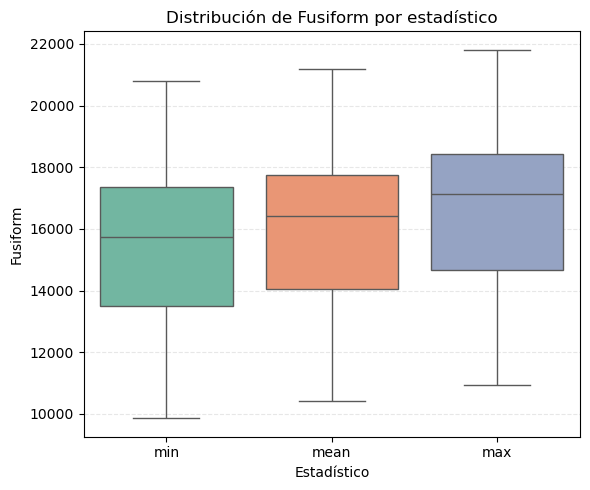

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\1002387156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


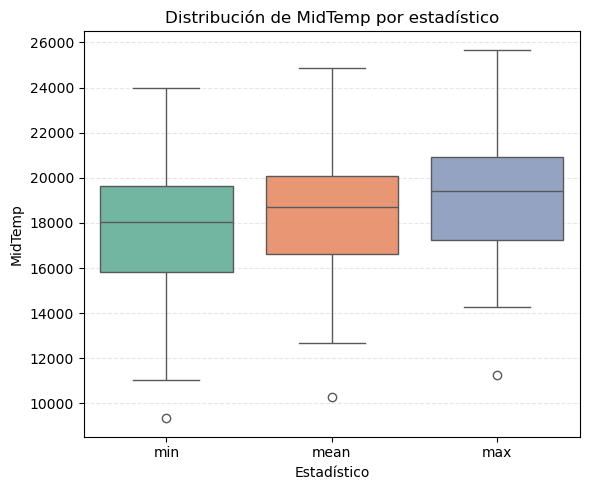

C:\Users\Hp\AppData\Local\Temp\ipykernel_4340\1002387156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


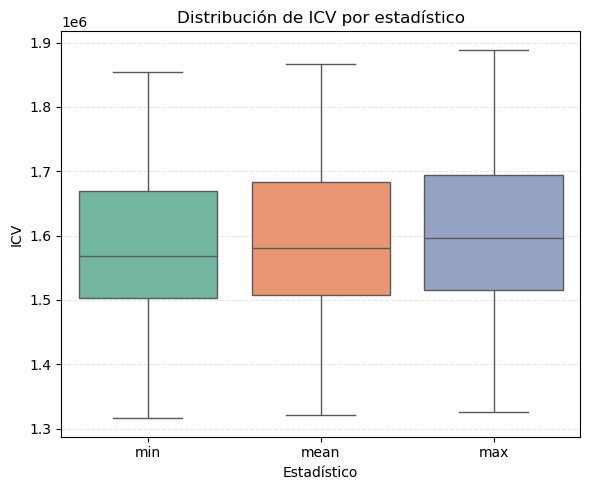

In [26]:
# Aplanar columnas
info_volumen.columns = ['sujeto_id'] + [f"{var}_{stat}" for var, stat in info_volumen.columns[1:]]

# Convertir a formato largo
info_long = pd.melt(
    info_volumen,
    id_vars="sujeto_id",
    var_name="variable_estadistica",
    value_name="valor"
)

# Separar nombre de variable y tipo de estadístico
info_long[["variable", "estadistica"]] = info_long["variable_estadistica"].str.rsplit("_", n=1, expand=True)

variables = info_long["variable"].unique()

for var in variables:
    plt.figure(figsize=(6, 5))
    sns.boxplot(
        data=info_long[info_long["variable"] == var],
        x="estadistica",
        y="valor",
        palette="Set2"
    )
    plt.title(f"Distribución de {var} por estadístico")
    plt.xlabel("Estadístico")
    plt.ylabel(var)
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

In [27]:
# Agrupar por variable y estadístico
tabla_resumen = info_long.groupby(["variable", "estadistica"])["valor"].agg(["min", "mean", "max"]).round(2).reset_index()
# Ordenar por variable y tipo de estadístico
tabla_resumen = tabla_resumen.sort_values(["variable", "estadistica"])

# Mostrar
tabla_resumen

,variable,estadistica,min,mean,max
0,Entorhinal,max,2023.00,3525.72,5366.00
1,Entorhinal,mean,1853.00,3193.29,4769.33
2,Entorhinal,min,1608.00,2867.83,4215.00
3,Fusiform,max,10946.00,16845.04,21808.00
4,Fusiform,mean,10424.33,16168.56,21181.33
5,Fusiform,min,9860.00,15484.26,20784.00
6,Hippocampus,max,4087.00,6481.80,9396.00
7,Hippocampus,mean,3717.67,6255.79,9251.50
8,Hippocampus,min,3471.00,6044.74,9102.00
9,ICV,max,1325720.00,1604374.63,1888900.00


* Dx inicial vrs DX final

In [28]:
df_dx = df.sort_values(["sujeto_id", "VISCODE"]).groupby("sujeto_id").agg(
    dx_inicio=("DX", "first"),
    dx_final=("DX", "last")
).reset_index()
tabla_transicion = df_dx.groupby(["dx_inicio", "dx_final"]).size().unstack(fill_value=0)
tabla_transicion

dx_final,MCI
dx_inicio,
CN,1
Dementia,2
MCI,51


## Binarias

In [29]:
df_final = df.sort_values(["sujeto_id", "VISCODE"]).groupby("sujeto_id").agg(
    edad_final=("AGE", "last"),
    dx_final=("DX", "last")
).reset_index()
tabla_edad_dx = df_final.groupby("dx_final")["edad_final"].describe().round(1)
tabla_edad_dx


,count,mean,std,min,25%,50%,75%,max
dx_final,,,,,,,,
MCI,54.0,74.9,7.1,60.3,70.4,75.5,79.7,88.3


* Valores COGNI x VISCODE

In [30]:
df.groupby(["VISCODE"]).mean(numeric_only=True)[[ 'CDRSB', 'MMSE', 'ADAS13', 'FAQ', 'RAVLT_immediate', 'RAVLT_learning',
       'RAVLT_forgetting', 'DIGITSCOR', 'TRABSCOR']]


,CDRSB,MMSE,ADAS13,FAQ,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,DIGITSCOR,TRABSCOR
VISCODE,,,,,,,,,
6.0,1.648148,26.370370,19.503774,4.388889,28.203704,3.296296,4.333333,38.388889,120.500000
12.0,1.913462,26.365385,19.917308,5.274510,29.230769,3.269231,4.384615,37.115385,134.326923
18.0,2.306818,25.636364,21.885682,5.977273,28.232558,2.744186,4.465116,37.204545,135.772727
24.0,2.776316,24.923077,22.983590,7.631579,27.384615,2.692308,4.641026,35.615385,158.564103
36.0,2.676471,25.833333,20.481111,6.833333,27.529412,3.352941,4.687500,39.117647,146.555556
48.0,1.500000,29.000000,16.670000,0.000000,24.000000,4.000000,1.000000,27.000000,71.000000
60.0,2.000000,30.000000,18.000000,4.000000,25.000000,3.000000,2.000000,NaN,80.000000


* Valores VOLUMEN x VISCODE

In [31]:
df.groupby(["VISCODE"]).mean(numeric_only=True)[[ 'Ventricles',
       'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp',
       'ICV']]

,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
VISCODE,,,,,,,
6.0,46228.269231,6261.978261,9.997762e+05,3192.630435,16441.608696,18751.043478,1.593958e+06
12.0,45096.211538,6306.266667,9.985779e+05,3233.288889,16194.133333,18470.155556,1.587804e+06
18.0,48541.785714,6233.076923,9.956000e+05,3149.153846,16172.000000,18107.717949,1.590309e+06
24.0,49140.714286,6054.965517,9.882099e+05,3163.620690,15852.931034,18447.862069,1.595686e+06
36.0,43789.687500,6172.000000,1.005277e+06,3119.692308,16343.307692,18659.846154,1.597869e+06
48.0,35437.000000,7024.000000,9.408680e+05,5029.000000,15187.000000,18260.000000,1.549330e+06
60.0,37559.000000,7139.000000,9.344150e+05,4241.000000,13470.000000,18829.000000,1.494760e+06


## Evolución por visita

In [32]:
tabla_dx = df.pivot_table(
    index="sujeto_id",
    columns="VISCODE",
    values="DX",
    aggfunc="first"  # Asume que hay una sola entrada por sujeto-visita
).fillna("-") 
tabla_dx

VISCODE,6.0,12.0,18.0,24.0,36.0,48.0,60.0
sujeto_id,,,,,,,
007_S_0101,MCI,MCI,MCI,Dementia,Dementia,-,-
007_S_0128,MCI,MCI,Dementia,Dementia,-,-,-
007_S_0249,MCI,Dementia,Dementia,Dementia,Dementia,-,-
013_S_0240,MCI,MCI,Dementia,-,-,-,-
014_S_0169,MCI,MCI,MCI,MCI,MCI,-,-
018_S_0057,MCI,MCI,Dementia,Dementia,-,-,-
018_S_0080,MCI,MCI,-,-,-,-,-
018_S_0087,MCI,MCI,MCI,-,-,-,-
018_S_0103,MCI,-,-,-,-,-,-
